In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, validation_curve, cross_val_score, KFold

---
# Q1
---

### (1) Perform pre-processing and visualization of the dataset. Split the data into train and test sets. Also identify the useful columns and drop the unnecessary ones.

In [3]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,111369,30.0000,C148,C,1


In [4]:
df.dtypes

PassengerId      int64
Name            object
Pclass           int64
Sex             object
Age            float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [5]:
df.describe()

,PassengerId,Pclass,Age,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,32.204208,0.383838
std,257.353842,0.836071,14.526497,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,512.329200,1.000000


In [6]:
df.columns.to_list()

['PassengerId',
 'Name',
 'Pclass',
 'Sex',
 'Age',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [7]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [8]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [9]:
df = df.dropna(axis=0)

In [10]:
df

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...
885,3,female,39.0,29.1250,Q,0
886,2,male,27.0,13.0000,S,0
887,1,female,19.0,30.0000,S,1
889,1,male,26.0,30.0000,C,1


In [11]:
some_features = ['Pclass', 'Age', 'Fare']

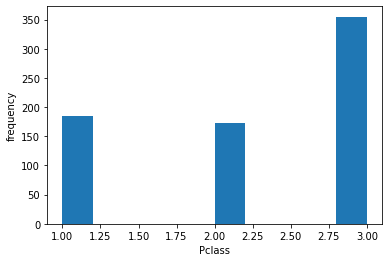

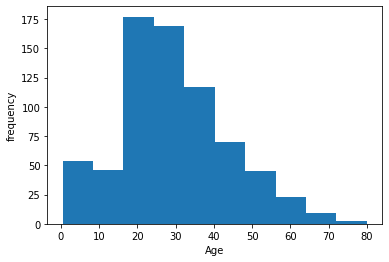

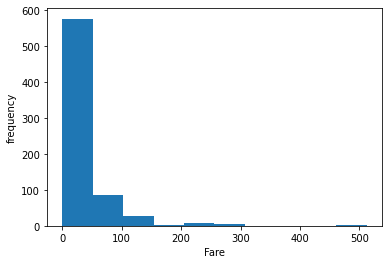

In [12]:
# '''
for feature in some_features:
    df[f'{feature}'].plot.hist()
    plt.xlabel(f'{feature}')
    plt.ylabel('frequency')
    plt.show()
# '''

In [13]:
df.Sex.describe()

count      712
unique       2
top       male
freq       453
Name: Sex, dtype: object

In [14]:
 df.Fare.describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
def plotGraph(colName):
    Dict = df[colName].value_counts().to_dict()
    ClassKeys = list(map(str, list(Dict.keys())))
    ClassValues = list(Dict.values())
    plt.bar(ClassKeys, ClassValues)
    plt.xlabel(str(colName))
    plt.ylabel('Number of Passengers')
    plt.show()

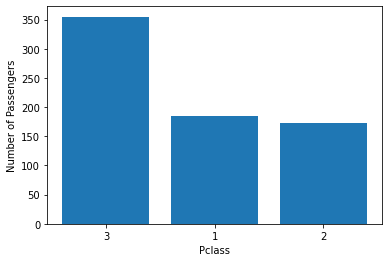

In [16]:
plotGraph('Pclass')

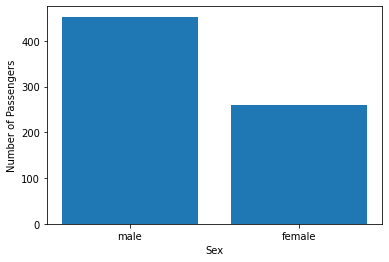

In [17]:
plotGraph('Sex')

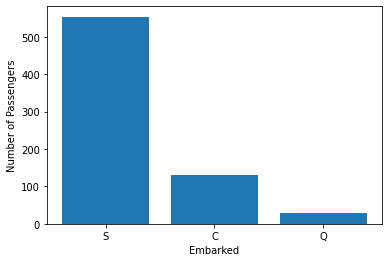

In [18]:
plotGraph('Embarked')

In [19]:
df['Pclass'] = df['Pclass'].astype('category')

In [20]:
classesToBeEncoded = ['Embarked', 'Sex']
for c in classesToBeEncoded:
    df[c] = df[c].astype('category')
    df[c] = df[c].cat.codes

In [21]:
df

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,1,22.0,7.2500,2,0
1,1,0,38.0,71.2833,0,1
2,3,0,26.0,7.9250,2,1
3,1,0,35.0,53.1000,2,1
4,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...
885,3,0,39.0,29.1250,1,0
886,2,1,27.0,13.0000,2,0
887,1,0,19.0,30.0000,2,1
889,1,1,26.0,30.0000,0,1


In [22]:
df.columns.to_list()

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Survived']

In [23]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']

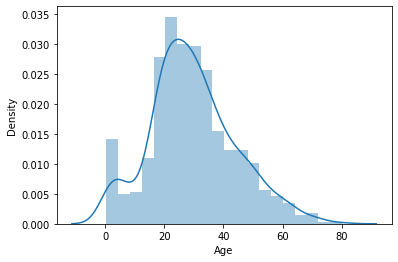

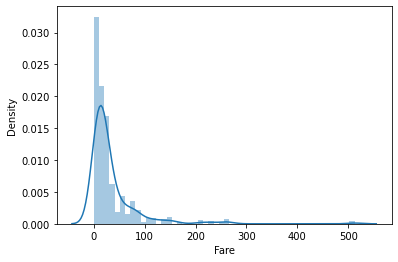

In [24]:
continuous_features = ['Age', 'Fare']
for feature in continuous_features:
    sns.distplot(df[feature])
    plt.show()

In [25]:
X = df[features]
y = df.Survived

In [26]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

### (3) Implement the identified variant of Naive Bayes Classifier using scikit learn, report its performance based on appropriate metrics (ROC AUC etc.).

In [27]:
clf = GaussianNB()

In [28]:
clf.fit(train_X, train_y)

GaussianNB()

In [29]:
df

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,1,22.0,7.2500,2,0
1,1,0,38.0,71.2833,0,1
2,3,0,26.0,7.9250,2,1
3,1,0,35.0,53.1000,2,1
4,3,1,35.0,8.0500,2,0
...,...,...,...,...,...,...
885,3,0,39.0,29.1250,1,0
886,2,1,27.0,13.0000,2,0
887,1,0,19.0,30.0000,2,1
889,1,1,26.0,30.0000,0,1


In [30]:
pred_y = clf.predict(test_X)

In [31]:
roc_auc_score(test_y, pred_y)

0.7426067415730336

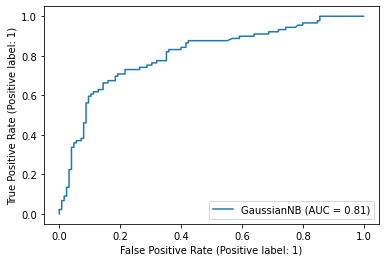

In [32]:
plot_roc_curve(clf, test_X, test_y)
plt.show()

### (4) Perform 5 fold cross validation and summarize the results across the cross-validation sets. Compute the probability of the top class for each row in the testing dataset.

In [33]:
kf = KFold(n_splits=5)
cv_score = cross_val_score(clf, train_X, train_y, cv=kf)
print(cv_score)
print(cv_score.mean())

[0.87       0.74       0.77       0.73737374 0.7979798 ]
0.783070707070707


In [34]:
clf.predict_proba(test_X)

array([[5.46603148e-01, 4.53396852e-01],
       [9.52814019e-01, 4.71859807e-02],
       [4.50482646e-04, 9.99549517e-01],
       [7.57678925e-01, 2.42321075e-01],
       [9.83165897e-01, 1.68341031e-02],
       [9.82109496e-01, 1.78905043e-02],
       [3.13055726e-01, 6.86944274e-01],
       [2.27876963e-01, 7.72123037e-01],
       [8.38935659e-01, 1.61064341e-01],
       [1.28530231e-01, 8.71469769e-01],
       [7.04590106e-03, 9.92954099e-01],
       [5.32513165e-01, 4.67486835e-01],
       [8.33805063e-03, 9.91661949e-01],
       [9.78256839e-01, 2.17431611e-02],
       [9.47449741e-01, 5.25502587e-02],
       [3.56002560e-01, 6.43997440e-01],
       [9.51812132e-01, 4.81878684e-02],
       [1.03596455e-01, 8.96403545e-01],
       [8.30133887e-01, 1.69866113e-01],
       [9.56339123e-01, 4.36608771e-02],
       [5.84354554e-01, 4.15645446e-01],
       [3.38081467e-01, 6.61918533e-01],
       [4.86116890e-02, 9.51388311e-01],
       [9.24542365e-01, 7.54576353e-02],
       [8.131243

In [35]:
class_probabilities = clf.predict_proba(test_X)

In [36]:
top_class_probability = []

for each in range(len(class_probabilities)):
    top_class_probability.append(max(class_probabilities[each]))

In [37]:
top_class_probability

[0.5466031483016004,
 0.9528140193459189,
 0.9995495173541707,
 0.7576789253375182,
 0.9831658969150052,
 0.982109495743981,
 0.6869442735961713,
 0.7721230365039489,
 0.8389356585787686,
 0.8714697685234987,
 0.9929540989395649,
 0.5325131647491042,
 0.9916619493683918,
 0.9782568389391727,
 0.9474497412564871,
 0.6439974395981071,
 0.951812131645688,
 0.8964035450286227,
 0.8301338866542736,
 0.9563391229181128,
 0.5843545536356536,
 0.6619185334981159,
 0.9513883110488659,
 0.924542364685715,
 0.8131243123718628,
 0.8313885229062024,
 0.9545515874173931,
 0.8816516081579997,
 0.700373825887538,
 0.5684901377221602,
 0.9999999999989626,
 0.9709376474837212,
 0.9787612703789964,
 0.5188602026978869,
 0.7133980564646619,
 0.696189800390312,
 0.9960638561824852,
 0.823292910872687,
 0.8342478288434209,
 0.6492430858484413,
 0.9458015309112713,
 0.9811653165139145,
 0.982408045425348,
 0.9816026281150058,
 0.9805175712417254,
 0.9779446812434404,
 0.9213226621608831,
 0.7983376408511985,

### (5) Make contour plots with the data points to visualize the class-conditional densities. 

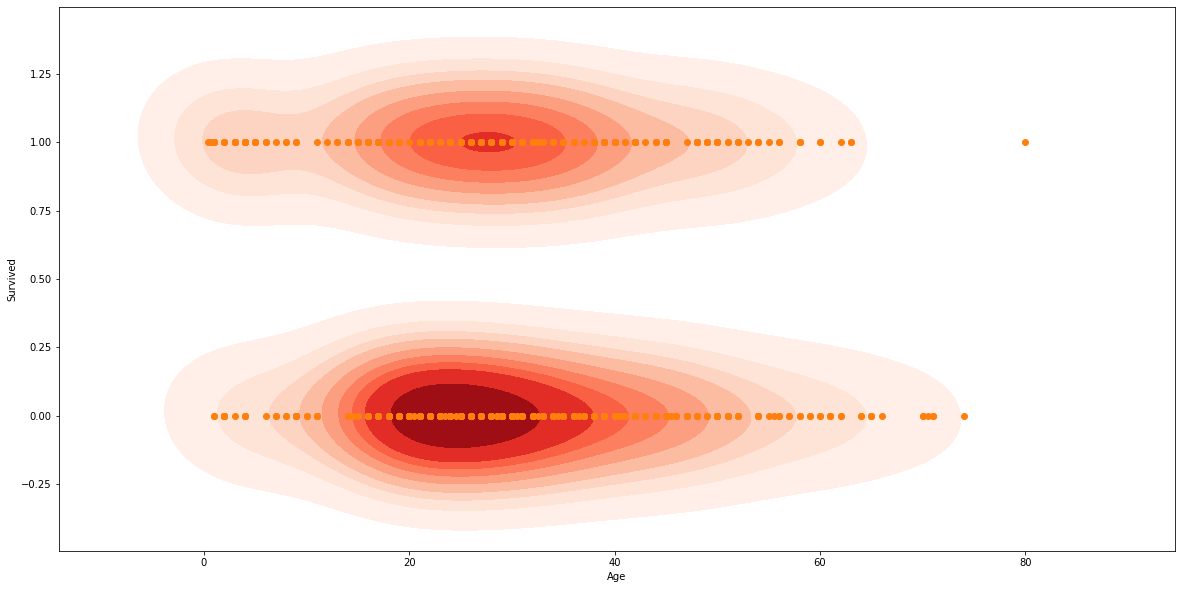

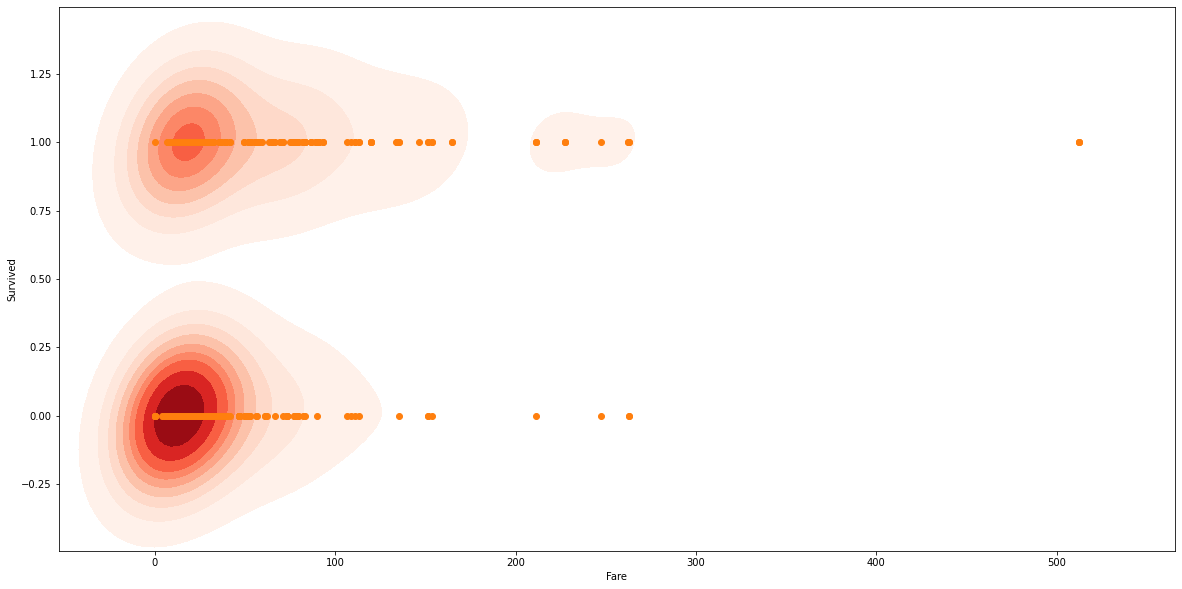

In [38]:
for feature in ['Age', 'Fare']:
    plt.figure(figsize=(20,10))
    sns.kdeplot(x=df[feature], y=df['Survived'], cmap="Reds", shade=True)
    plt.scatter(x=df[feature], y=df['Survived'])
    plt.show()

### (6) Compare your model with the Decision Tree classifier on the same dataset by performing 5-fold cross-validation and summarizing the results.

In [39]:
def kfold_cv(train_X, train_y, test_X, test_y, depth=None, split=2, leaf=1):
    dt_clf = DecisionTreeClassifier(random_state=0, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
    kf = KFold(n_splits=5)
    cv_score = cross_val_score(dt_clf, train_X, train_y, cv=kf)
    print(cv_score)
    print(cv_score.mean())
    
    dt_clf.fit(train_X, train_y)
    plot_roc_curve(dt_clf, test_X, test_y)

[0.79       0.79       0.76       0.80808081 0.73737374]
0.777090909090909


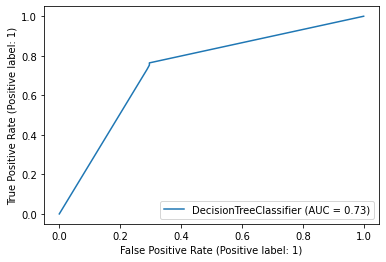

In [40]:
kfold_cv(train_X, train_y, test_X, test_y)

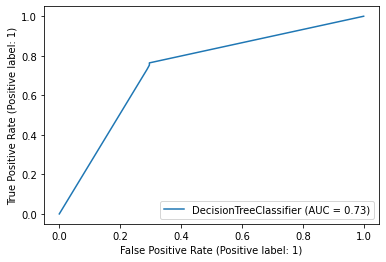

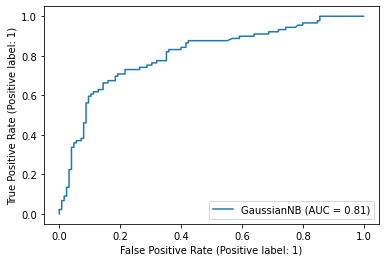

In [41]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(train_X, train_y)

plot_roc_curve(dt_clf, test_X, test_y)
plot_roc_curve(clf, test_X, test_y)
plt.show()

---
# Q2
---

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('dataset.csv')
df

,X0,X1,X2,X3,X4,X5,X6,Y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


**Features**:-  
X0 = Area  
X1 = Perimeter  
X2 = Compactness  
X3 = Length of kernel  
X4 = Width of kernel  
X5 = Asymmetry coefficient  
X6 = Length of kernel groove  
X7 =  Class (1, 2, 3)  

### (a) Use histogram to plot the distribution of samples.

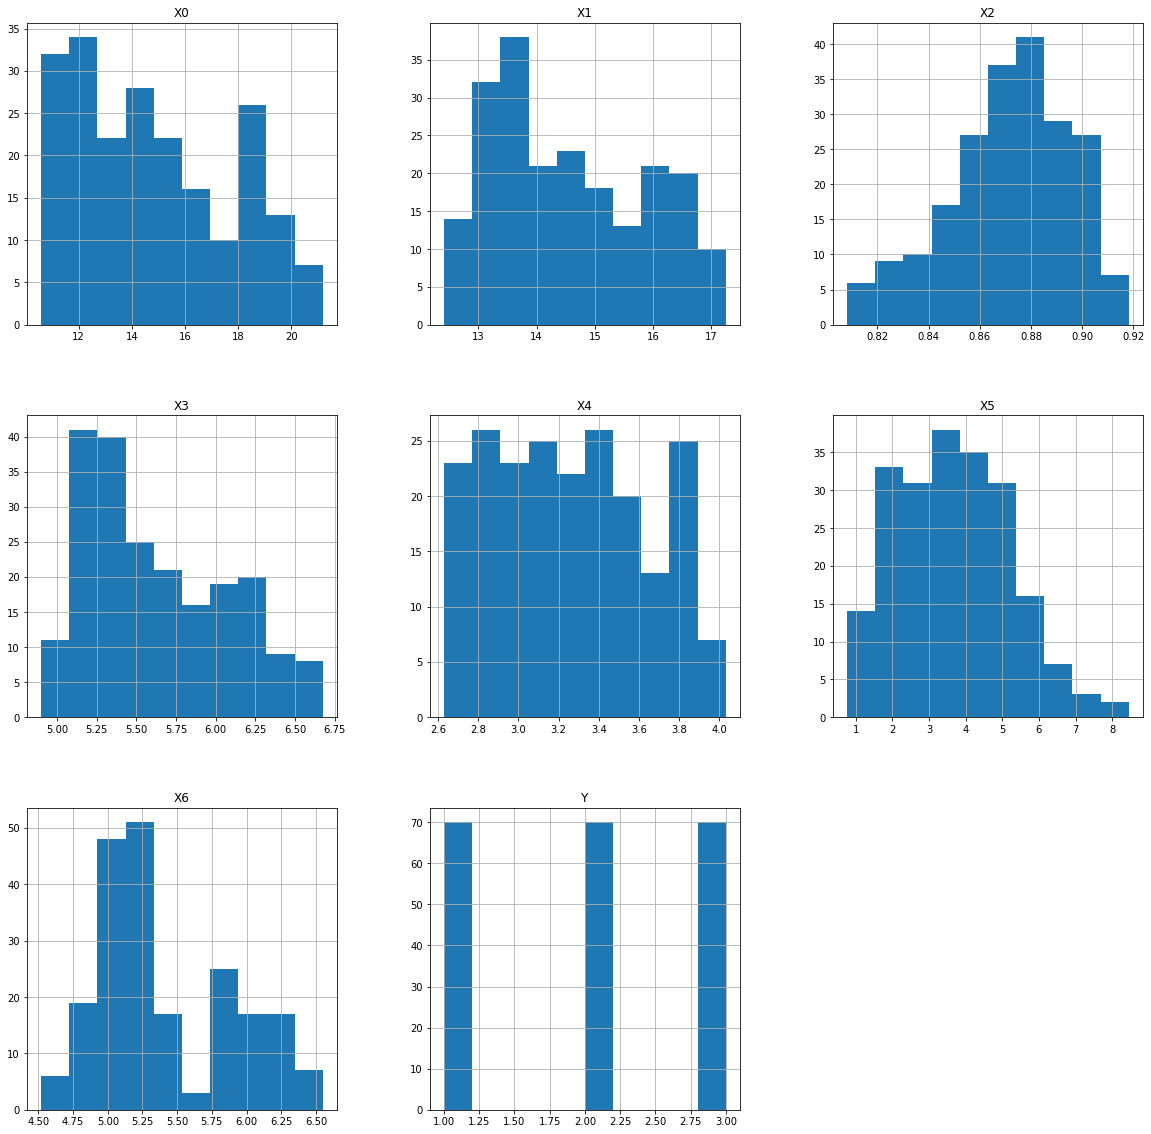

In [44]:
df.hist(figsize=(20,20))
plt.show()

### (b) Determine the prior probability for all the classes.

In [45]:
df['Y'].unique()

array([1, 2, 3], dtype=int64)

Hence, total unique classes are 3.

In [46]:
def prior(Class):
    return len(df[df['Y']==Class])/len(df)

In [47]:
prior1 = prior(1)
prior2 = prior(2)
prior3 = prior(3)

In [48]:
print('prior(ω1) =', prior1, '\nprior(ω2) =', prior2, '\nprior(ω3) =',prior3)

prior(ω1) = 0.3333333333333333 
prior(ω2) = 0.3333333333333333 
prior(ω3) = 0.3333333333333333


In [49]:
prior1 + prior2 + prior3

1.0

### (c) Discretize the features into bins from scratch.

In [50]:
def binning_using_difference(df, feature_name, diff):
    min_element = df[feature_name].min()
    max_element = df[feature_name].max()
    
    list_of_lists_of_indices = []
    list_of_bin_names = []
    
    num = round(int(min_element/diff)*diff, 2)
    
    while(max_element - num > 0):
        df_needed = df[feature_name]
        df_needed = df_needed[df_needed >= num]
        df_needed = df_needed[df_needed < num + diff]
        list_of_indices = list(df_needed.index)
        
        list_of_lists_of_indices.append(list_of_indices)
        list_of_bin_names.append(f'{num:.2f}-{(num+diff):.2f}')
        
        num += diff

    df[f'bin-{feature_name}'] = 0
        
    for l in range(len(list_of_lists_of_indices)):
        corresponding_name = list_of_bin_names[l]
        if len(list_of_lists_of_indices[l]) > 0:
            for ind in list_of_lists_of_indices[l]:
                df[f'bin-{feature_name}'][ind] = corresponding_name
            
    return df

In [51]:
features = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']
diff_for_features = [2, 1, 0.02, 0.25, 0.2, 1, 0.25]

In [52]:
for i in range(len(features)):
    df = binning_using_difference(df, features[i], diff_for_features[i])

In [53]:
df

,X0,X1,X2,X3,X4,X5,X6,Y,bin-X0,bin-X1,bin-X2,bin-X3,bin-X4,bin-X5,bin-X6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,14.00-16.00,14.00-15.00,0.86-0.88,5.75-6.00,3.20-3.40,2.00-3.00,5.00-5.25
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,14.00-16.00,14.00-15.00,0.88-0.90,5.50-5.75,3.20-3.40,1.00-2.00,4.75-5.00
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,14.00-16.00,14.00-15.00,0.90-0.92,5.25-5.50,3.20-3.40,2.00-3.00,4.75-5.00
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,12.00-14.00,13.00-14.00,0.88-0.90,5.25-5.50,3.20-3.40,2.00-3.00,4.75-5.00
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,16.00-18.00,14.00-15.00,0.90-0.92,5.50-5.75,3.40-3.60,1.00-2.00,5.00-5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,12.00-14.00,13.00-14.00,0.86-0.88,5.00-5.25,2.80-3.00,3.00-4.00,4.75-5.00
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,10.00-12.00,12.00-13.00,0.84-0.86,5.00-5.25,2.60-2.80,4.00-5.00,5.00-5.25
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,12.00-14.00,13.00-14.00,0.88-0.90,5.00-5.25,3.20-3.40,8.00-9.00,5.00-5.25
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,10.00-12.00,13.00-14.00,0.84-0.86,5.00-5.25,2.80-3.00,3.00-4.00,5.00-5.25


### (d) Determine the likelihood/class conditional probabilities for all the classes.

class conditional = p(x | ωj) = p(x ∩ ωj) / p(ωj)

In [54]:
new_df = pd.read_csv('dataset.csv')

In [55]:
def new_binning_using_difference(df, feature_name, diff):
    min_element = df[feature_name].min()
    max_element = df[feature_name].max()
    
    list_of_lists_of_indices = []
    list_of_bin_names = []
    
    num = round(int(min_element/diff)*diff, 2)
    
    name = 1
    while(max_element - num > 0):
        df_needed = df[feature_name]
        df_needed = df_needed[df_needed >= num]
        df_needed = df_needed[df_needed < num + diff]
        list_of_indices = list(df_needed.index)
        
        list_of_lists_of_indices.append(list_of_indices)
        list_of_bin_names.append(name)
        
        num += diff
        name += 1

    df[f'bin-{feature_name}'] = 0
        
    for l in range(len(list_of_lists_of_indices)):
        corresponding_name = list_of_bin_names[l]
        if len(list_of_lists_of_indices[l]) > 0:
            for ind in list_of_lists_of_indices[l]:
                df[f'bin-{feature_name}'][ind] = corresponding_name
            
    return df

In [56]:
features = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']
diff_for_features = [2, 1, 0.02, 0.25, 0.2, 1, 0.25]

In [57]:
for i in range(len(features)):
    new_df = new_binning_using_difference(new_df, features[i], diff_for_features[i])

In [58]:
prior_dict = {1: prior1, 2: prior2, 3: prior3}

def likelihood(new_df, Feature, Bin, Class):
    L = len(new_df)
    
    new_df = new_df[new_df[Feature]==Bin]
    new_df = new_df[new_df['Y']==Class]
    
    return len(new_df)/(L * prior_dict[Class])

In [59]:
for Feature in ['bin-X0', 'bin-X1', 'bin-X2', 'bin-X3', 'bin-X4', 'bin-X5', 'bin-X6']:
    length = len(new_df[Feature].unique())
    
    for each in range(1, length+1):
        for Class in range(1,4):
            print(f'Likelihood for bin no.:{each}, in {Feature[4:7]} for class {Class} =', likelihood(new_df, Feature, each, Class))
        print('\n')
    print('-'*70,'\n')

Likelihood for bin no.:1, in X0 for class 1 = 0.02857142857142857
Likelihood for bin no.:1, in X0 for class 2 = 0.0
Likelihood for bin no.:1, in X0 for class 3 = 0.5285714285714286


Likelihood for bin no.:2, in X0 for class 1 = 0.3142857142857143
Likelihood for bin no.:2, in X0 for class 2 = 0.0
Likelihood for bin no.:2, in X0 for class 3 = 0.4714285714285714


Likelihood for bin no.:3, in X0 for class 1 = 0.5571428571428572
Likelihood for bin no.:3, in X0 for class 2 = 0.08571428571428572
Likelihood for bin no.:3, in X0 for class 3 = 0.0


Likelihood for bin no.:4, in X0 for class 1 = 0.1
Likelihood for bin no.:4, in X0 for class 2 = 0.2571428571428571
Likelihood for bin no.:4, in X0 for class 3 = 0.0


Likelihood for bin no.:5, in X0 for class 1 = 0.0
Likelihood for bin no.:5, in X0 for class 2 = 0.5285714285714286
Likelihood for bin no.:5, in X0 for class 3 = 0.0


Likelihood for bin no.:6, in X0 for class 1 = 0.0
Likelihood for bin no.:6, in X0 for class 2 = 0.12857142857142856
Li

### (e) Plot the count of each unique element for each class.

In [60]:
for i in range(0,7):
    print(df.groupby(f'bin-X{i}')['Y'].value_counts())
    print('\n')

bin-X0       Y
10.00-12.00  3    37
             1     2
12.00-14.00  3    33
             1    22
14.00-16.00  1    39
             2     6
16.00-18.00  2    18
             1     7
18.00-20.00  2    37
20.00-22.00  2     9
Name: Y, dtype: int64


bin-X1       Y
12.00-13.00  3    16
             1     2
13.00-14.00  3    54
             1    16
14.00-15.00  1    46
             2     4
15.00-16.00  2    22
             1     6
16.00-17.00  2    39
17.00-18.00  2     5
Name: Y, dtype: int64


bin-X2     Y
0.80-0.82  3     8
0.82-0.84  3    16
           1     1
0.84-0.86  3    26
           1     6
           2     6
0.86-0.88  1    28
           2    24
           3    14
0.88-0.90  2    30
           1    27
           3     6
0.90-0.92  2    10
           1     8
Name: Y, dtype: int64


bin-X3     Y
4.75-5.00  3     3
           1     1
5.00-5.25  3    38
           1     9
5.25-5.50  3    28
           1    21
           2     2
5.50-5.75  1    30
           2     1
           3   

In [61]:
for i in range(0,7):
    print(f'bin-X{i} =', dict(df.groupby(f'bin-X{i}')['Y'].value_counts()))
    print('\n')

bin-X0 = {('10.00-12.00', 3): 37, ('10.00-12.00', 1): 2, ('12.00-14.00', 3): 33, ('12.00-14.00', 1): 22, ('14.00-16.00', 1): 39, ('14.00-16.00', 2): 6, ('16.00-18.00', 2): 18, ('16.00-18.00', 1): 7, ('18.00-20.00', 2): 37, ('20.00-22.00', 2): 9}


bin-X1 = {('12.00-13.00', 3): 16, ('12.00-13.00', 1): 2, ('13.00-14.00', 3): 54, ('13.00-14.00', 1): 16, ('14.00-15.00', 1): 46, ('14.00-15.00', 2): 4, ('15.00-16.00', 2): 22, ('15.00-16.00', 1): 6, ('16.00-17.00', 2): 39, ('17.00-18.00', 2): 5}


bin-X2 = {('0.80-0.82', 3): 8, ('0.82-0.84', 3): 16, ('0.82-0.84', 1): 1, ('0.84-0.86', 3): 26, ('0.84-0.86', 1): 6, ('0.84-0.86', 2): 6, ('0.86-0.88', 1): 28, ('0.86-0.88', 2): 24, ('0.86-0.88', 3): 14, ('0.88-0.90', 2): 30, ('0.88-0.90', 1): 27, ('0.88-0.90', 3): 6, ('0.90-0.92', 2): 10, ('0.90-0.92', 1): 8}


bin-X3 = {('4.75-5.00', 3): 3, ('4.75-5.00', 1): 1, ('5.00-5.25', 3): 38, ('5.00-5.25', 1): 9, ('5.25-5.50', 3): 28, ('5.25-5.50', 1): 21, ('5.25-5.50', 2): 2, ('5.50-5.75', 1): 30, ('5.50-5

In [62]:
new_df

,X0,X1,X2,X3,X4,X5,X6,Y,bin-X0,bin-X1,bin-X2,bin-X3,bin-X4,bin-X5,bin-X6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,3,3,4,5,4,3,3
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,3,3,5,4,4,2,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,3,3,6,3,4,3,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,2,2,5,3,4,3,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,4,3,6,4,5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,2,2,4,2,2,4,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,1,1,3,2,1,5,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,2,2,5,2,4,9,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,1,2,3,2,2,4,3


In [63]:
for i in range(0,7):
    print(f'bin_X{i} =', dict(new_df.groupby(f'bin-X{i}')['Y'].value_counts()))
    print('\n')

bin_X0 = {(1, 3): 37, (1, 1): 2, (2, 3): 33, (2, 1): 22, (3, 1): 39, (3, 2): 6, (4, 2): 18, (4, 1): 7, (5, 2): 37, (6, 2): 9}


bin_X1 = {(1, 3): 16, (1, 1): 2, (2, 3): 54, (2, 1): 16, (3, 1): 46, (3, 2): 4, (4, 2): 22, (4, 1): 6, (5, 2): 39, (6, 2): 5}


bin_X2 = {(1, 3): 8, (2, 3): 16, (2, 1): 1, (3, 3): 26, (3, 1): 6, (3, 2): 6, (4, 1): 28, (4, 2): 24, (4, 3): 14, (5, 2): 30, (5, 1): 27, (5, 3): 6, (6, 2): 10, (6, 1): 8}


bin_X3 = {(1, 3): 3, (1, 1): 1, (2, 3): 38, (2, 1): 9, (3, 3): 28, (3, 1): 21, (3, 2): 2, (4, 1): 30, (4, 2): 1, (4, 3): 1, (5, 2): 17, (5, 1): 8, (6, 2): 26, (6, 1): 1, (7, 2): 16, (8, 2): 8}


bin_X4 = {(1, 3): 29, (2, 3): 30, (2, 1): 6, (3, 1): 24, (3, 3): 10, (4, 1): 26, (4, 2): 5, (4, 3): 1, (5, 2): 21, (5, 1): 13, (6, 2): 25, (6, 1): 1, (7, 2): 17, (8, 2): 2}


bin_X5 = {(1, 1): 3, (2, 1): 18, (2, 2): 5, (2, 3): 1, (3, 1): 26, (3, 2): 19, (3, 3): 4, (4, 2): 19, (4, 1): 14, (4, 3): 12, (5, 3): 27, (5, 2): 17, (5, 1): 6, (6, 3): 16, (6, 2): 8, (6, 1): 2, (7, 3

In [64]:
def plotter(d, Title):
    d1 = {}; d2 = {}; d3 = {}
    max_bin = 1
    for key,val in d.items():
        feature, y = key
        if y==1:
            d1[feature] = val
        elif y==2:
            d2[feature] = val
        elif y==3:
            d3[feature] = val
        max_bin = max(max_bin, feature)
        
    x = []
    for i in range(1,max_bin+1):
        x.append(i)
        
    y1 = [0 for i in range(max_bin)]
    for i in d1.keys():
        y1[i-1] = d1[i]
    
    y2 = [0 for i in range(max_bin)]
    for i in d2.keys():
        y2[i-1] = d2[i]
        
    y3 = [0 for i in range(max_bin)]
    for i in d3.keys():
        y3[i-1] = d3[i]
        
    plt.plot(x,y1,'o-y')
    plt.plot(x,y2,'o-m')
    plt.plot(x,y3,'o-c')
    
    plt.xlabel('bins')
    plt.ylabel('count')
    plt.title(f'Count of each unique element for each class for {Title}')
    
    plt.show()

In [65]:
bin_X0 = {(1, 3): 37, (1, 1): 2, (2, 3): 33, (2, 1): 22, (3, 1): 39, (3, 2): 6, (4, 2): 18, (4, 1): 7, (5, 2): 37, (6, 2): 9}


bin_X1 = {(1, 3): 16, (1, 1): 2, (2, 3): 54, (2, 1): 16, (3, 1): 46, (3, 2): 4, (4, 2): 22, (4, 1): 6, (5, 2): 39, (6, 2): 5}


bin_X2 = {(1, 3): 8, (2, 3): 16, (2, 1): 1, (3, 3): 26, (3, 1): 6, (3, 2): 6, (4, 1): 28, (4, 2): 24, (4, 3): 14, (5, 2): 30, (5, 1): 27, (5, 3): 6, (6, 2): 10, (6, 1): 8}


bin_X3 = {(1, 3): 3, (1, 1): 1, (2, 3): 38, (2, 1): 9, (3, 3): 28, (3, 1): 21, (3, 2): 2, (4, 1): 30, (4, 2): 1, (4, 3): 1, (5, 2): 17, (5, 1): 8, (6, 2): 26, (6, 1): 1, (7, 2): 16, (8, 2): 8}


bin_X4 = {(1, 3): 29, (2, 3): 30, (2, 1): 6, (3, 1): 24, (3, 3): 10, (4, 1): 26, (4, 2): 5, (4, 3): 1, (5, 2): 21, (5, 1): 13, (6, 2): 25, (6, 1): 1, (7, 2): 17, (8, 2): 2}


bin_X5 = {(1, 1): 3, (2, 1): 18, (2, 2): 5, (2, 3): 1, (3, 1): 26, (3, 2): 19, (3, 3): 4, (4, 2): 19, (4, 1): 14, (4, 3): 12, (5, 3): 27, (5, 2): 17, (5, 1): 6, (6, 3): 16, (6, 2): 8, (6, 1): 2, (7, 3): 6, (7, 2): 2, (7, 1): 1, (8, 3): 2, (9, 3): 2}


bin_X6 = {(1, 1): 7, (1, 3): 1, (2, 1): 15, (2, 3): 11, (3, 3): 41, (3, 1): 32, (3, 2): 1, (4, 3): 17, (4, 1): 12, (4, 2): 1, (5, 2): 4, (5, 1): 3, (6, 2): 30, (6, 1): 1, (7, 2): 22, (8, 2): 11, (9, 2): 1}

In [66]:
all_bins_dict = [bin_X0, bin_X1, bin_X2, bin_X3, bin_X4, bin_X5, bin_X6]

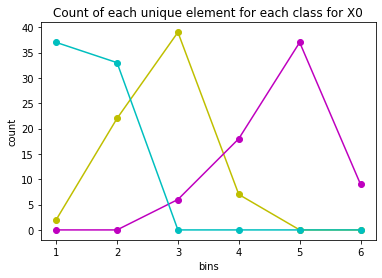

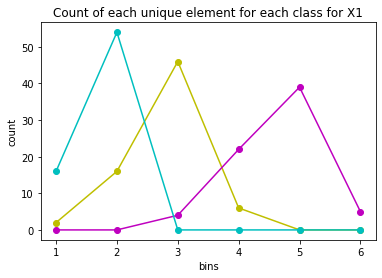

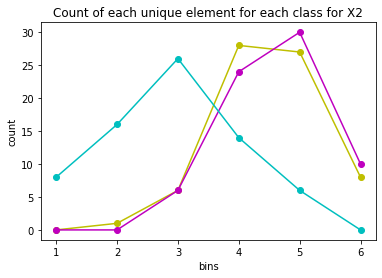

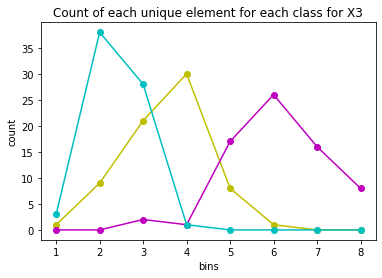

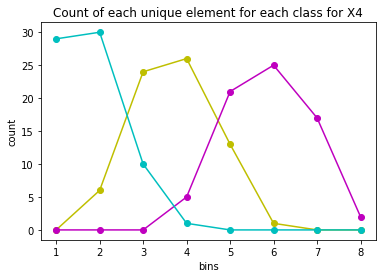

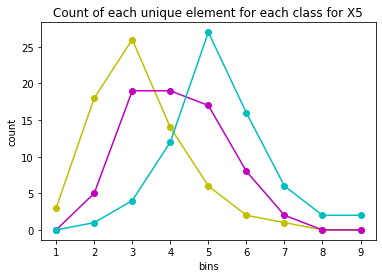

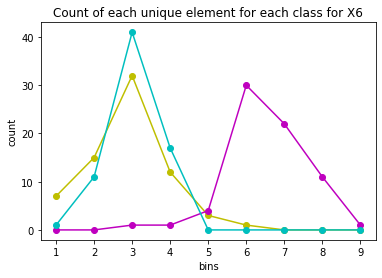

In [67]:
for b in range(len(all_bins_dict)):
    plotter(all_bins_dict[b], Title=features[b])

### (f) Calculate the posterior probabilities and plot them in a single graph.

In [68]:
def posterior(new_df, Feature, Bin, Class):
    L = len(new_df[new_df[Feature]==Bin])
    
    new_df = new_df[new_df[Feature]==Bin]
    new_df = new_df[new_df['Y']==Class]
    
    return len(new_df)/L

In [69]:
def plot_posterior(new_df, Feature, Title):
    length = len(new_df[Feature].unique())
    
    x = []
    for i in range(1,length+1):
        x.append(i)

    y1 = [0 for i in range(length)]
    for i in range(length):
        y1[i] = posterior(new_df, Feature, i+1, 1)

    y2 = [0 for i in range(length)]
    for i in range(length):
        y2[i] = posterior(new_df, Feature, i+1, 2)

    y3 = [0 for i in range(length)]
    for i in range(length):
        y3[i] = posterior(new_df, Feature, i+1, 3)

    plt.plot(x,y1,'o-y')
    plt.plot(x,y2,'o-m')
    plt.plot(x,y3,'o-c')

    plt.xlabel('bins')
    plt.ylabel('posterior probabilities')
    plt.title(f'posterior probabilities for {Title}')

    plt.show()

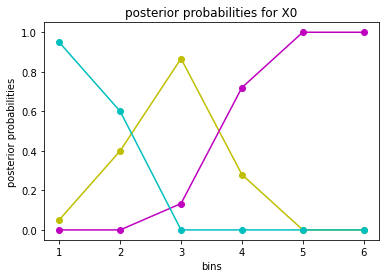

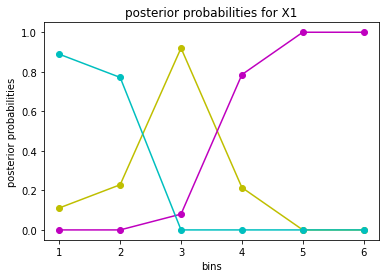

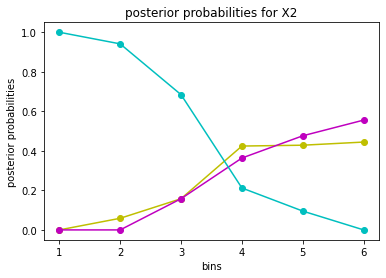

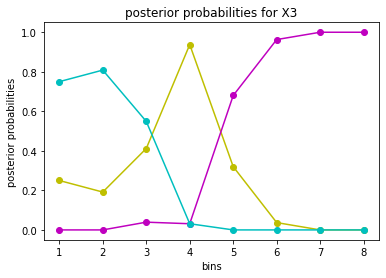

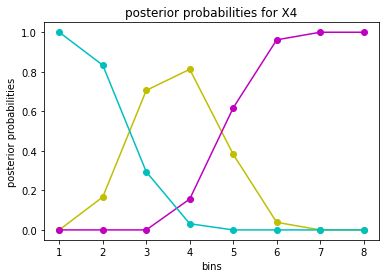

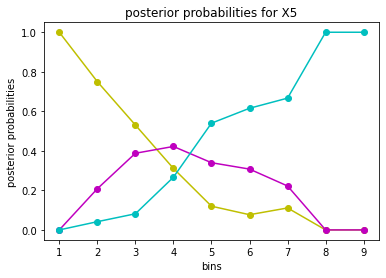

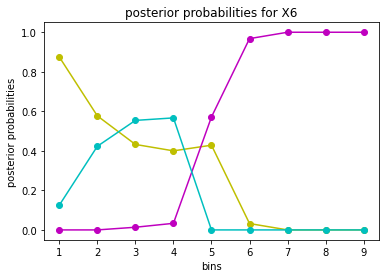

In [70]:
for feature in ['bin-X0', 'bin-X1', 'bin-X2', 'bin-X3', 'bin-X4', 'bin-X5', 'bin-X6']:
    plot_posterior(new_df, feature, feature[4:7])